# PHYS 309 Assignment 1

### Getting started

<ul>
    <li>If you do not already have the <a href="https://www.anaconda.com/products/distribution">Anaconda <tt>python</tt> distribution</a>, click the link to install the individual, free version</li>
    <li>Download this notebook to your own computer, open with <tt>Jupyter</tt> notebook or lab, and complete the missing code. See the <a href="https://docs.jupyter.org/en/latest/start/index.html"><tt>Jupyter</tt> documentation</a> for help.</li>
</ul>

<strong>Instead of putting in the values of physical constants such as $c$ and $\epsilon_0$ by hand, use SI values pre-programmed into [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html).

### Set up <tt>python</tt> environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

 # Contains physical constants defined in SI units (default) as well as other systems
from scipy import constants

# Make easily readable plots with large axis labels
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

### Questions


Recall that the speed of light in vacuum is 
\begin{equation}
c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}, \; \; \; \; \; (1)
\end{equation}
where $\epsilon_0 = 8.85 \times 10^{-12}$ F/m (Farads per meter)$^{*}$ is the electric permittivity of free space and $\mu_0 = 1.26 \times 10^{-6}$ N/A$^2$ (Newtons per Ampere$^2$)$^{**}$ is the magnetic permeability of free space. The electric field created by a point charge $q$ is
\begin{equation}
E = \frac{1}{4 \pi \epsilon_0} \frac{q}{r^2}. \; \; \; \; (2)
\end{equation}
Suppose a charged particle is moving at some fraction of the speed of light in vacuum ($v_q = f c; \; 0 < f < 1$) as seen in reference frame $S$. Reference frame $S^{\prime}$ is co-moving with the point charge, so that $\frac{dx^{\prime}}{dt^{\prime}} = v^{\prime}_q = 0$ in frame $S^{\prime}$. To make the math easier, put $q$ at the origin of $S^{\prime}$.

To understand Einstein's motivation for developing the special theory of relativity, make the <strong>incorrect, erroneous, and wrong</strong> assumption that the Galilean velocity transformation holds true for all values of $f$:
\begin{equation}
\frac{dx^{\prime}}{dt^{\prime}} = \frac{dx}{dt} - v_q \; \; \; (3)
\end{equation}

<ol>
    <li>Assume the charged particle is an electron. Using Equation 2, calculate and plot the electric field as a function of distance $r^{\prime}$ from $q$ in frame $S^{\prime}$. Choose an x-axis range that makes sense to you and label both axes with correct units.</li>
</ol>

$^{*}$Farad = Coulomb/Volt: Farad is the unit of capacitance, which measures the amount of charge necessary to increase the electric potential of a system by 1 Volt. Farads/meter measure how much capacitance you get per meter of free space between yourself and a charged particle.

$^{**}$Newtons/Ampere$^2$ = Newtons/(Coulombs/second)$^2$. $\mu_0$ measures how effective inductance is at creating magnetic force in free space.

Text(0, 0.5, 'Electric Field (V/m)')

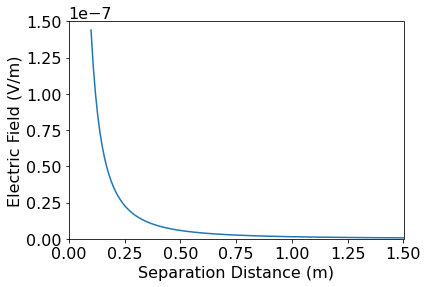

In [67]:
q = constants.e
rlist = []
Elec_List = []

r = 0.1
while 0 < r < 2:
    E = q*(1/(4*constants.pi*constants.epsilon_0*r**2))
    rlist.append(r)
    Elec_List.append(E)
    r = r + 0.01
    
plt.plot(rlist, Elec_List)
plt.xlim([0, 1.5])
plt.ylim([0, 1.5E-7])
plt.xlabel("Separation Distance (m)")
plt.ylabel("Electric Field (V/m)")

<ol start=2>
    <li>The Galilean velocity transformation suggests that objects can "catch up" with light, so that light in a vacuum appears to be going slower than the value of $c$ from Equation (1). Make a plot of $c^{\prime}$, the <strong>incorrect</strong> speed of light in frame $S^{\prime}$ according to the Galilean transformation, as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

Text(0, 0.5, "C' (m/s)")

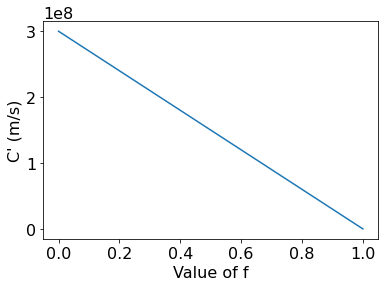

In [6]:
c = 1/((constants.epsilon_0*constants.mu_0)**(1/2))
nclist = []
f_list = []
f = 0

while 0 <= f <= 1:
    cprime = c*(1-f)
    f_list.append(f)
    nclist.append(cprime)
    f = f + 0.1
    
plt.plot(f_list, nclist)
plt.xlabel("Value of f")
plt.ylabel("C' (m/s)")

<ol start=3>
    <li>In frame $S^{\prime}$, something has to give: either Equation (1) is no longer true, or the values of $\epsilon_0$ and/or $\mu_0$ have to change. Suppose Equation (1) is still true and $\mu_0 = \mu_0^{\prime}$. Make a plot with two vertically stacked subplots. The top subplot should show $\epsilon_0^{\prime}$ as a function of $f$, while the bottom plot should show the electric field $E^{\prime} = \frac{1}{4 \pi \epsilon_0^{\prime}} \frac{q}{{r^{\prime}}^2}$ at $r^{\prime} = 1 \mu \mathrm{m} = 10^{-6}$ m as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

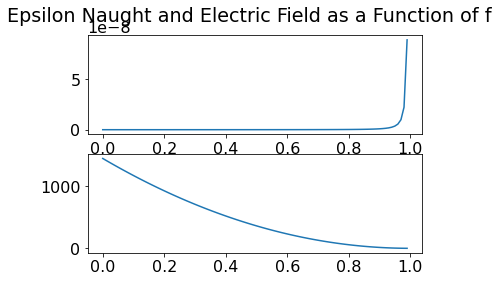

In [22]:
c = 1/((constants.epsilon_0*constants.mu_0)**(1/2))
r = 1E-6 #units = meters

epsilon_list = []
f_list = []
ef_list = []
f = 0

while 0 <= f <= 1:
    cprime = c*(1-f)
    epsilon_prime = 1/(((c**2)*(1-f)**2)*constants.mu_0)
    E_prime = q*(1/(4*constants.pi*epsilon_prime*(r**2)))
    epsilon_list.append(epsilon_prime)
    f_list.append(f)
    ef_list.append(E_prime)
    f = f + 0.01
    
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Epsilon Naught and Electric Field as a Function of f')
ax1.plot(f_list, epsilon_list)
ax2.plot(f_list, ef_list)
#ax2.plt.xlabel("Values of f")
#Label axes later

<ol start=4>
    <li>Now assume $f = 0.5$. In the same plot window, plot $E^{\prime}(r^{\prime})$ given by Equation 2 (same curve as in Problem 1) <em>and</em> $E^{\prime}(r^{\prime})$ calculated as in Problem 3, where $\epsilon_0^{\prime}$ is a function of $f$. Do you notice a problem?</li>
</ol>

Text(0, 0.5, 'Electric Field (V/m)')

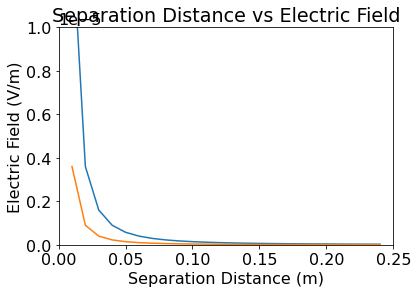

In [98]:
f = 0.5
q = constants.e
cprime = c*(1-f)
epsilon_prime = 1/(((c**2)*(1-f)**2)*constants.mu_0)
rprime = 0.01

rprimelist = []
E_List = []
EP_List = []

while 0 < rprime < 0.25:
    E = q*(1/(4*constants.pi*constants.epsilon_0*rprime**2))
    Eprime = q*(1/(4*constants.pi*epsilon_prime*rprime**2))
    rprimelist.append(rprime)
    E_List.append(E)
    EP_List.append(Eprime)
    rprime = rprime + 0.01
    
plt.plot(rprimelist, E_List)
plt.plot(rprimelist, EP_List)
plt.title("Separation Distance vs Electric Field")
plt.xlim([0, 0.25])
plt.ylim([0, 1E-5])
plt.xlabel("Separation Distance (m)")
plt.ylabel("Electric Field (V/m)")

#Note: Blue is Electric Field and Orange is Electric Field Prime

The problem with these two graphs is that they are exactly the same. This does not make sense since the value of f changes epsilon naught. We'd expect a graph with two identical plots but one of them is translated, however, this does not appear when we make epsilon naught as a function of f. 

Since f = 0.5, cprime is half of the speed of light c, but this does not change the final result of the electric fields. Therefore this is not a good estimatation of E-field'. 

<ol start=5>
    <li>To resolve the issues revealed by the plot from Problem 4, you may suggest setting $\epsilon_0^{\prime} = \epsilon_0$ and allowing $\mu_0^{\prime}$ to vary with $f$. Let's explore that solution. To accompany the point charge in problems 1-4, add a current loop that's also at rest in frame $S^{\prime}$. Recall that the magnitude of the magnetic field strength at the center of the loop in frame $S$ is $B = \frac{\mu_0 I}{2R}$, where $I$ is the current and $R$ is the radius of the loop. Suppose $I = 1$ A and $R = 1$ m. Assume $E^{\prime} = E$, $B^{\prime} = B$, and $c^{\prime}$ depends on $f$ as in problem 2. Plot $\mu_0$ as a function of $f$.</li>
</ol>

Text(0.5, 1.0, "Values of F vs Mu_0'")

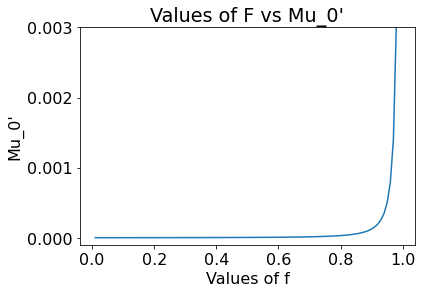

In [101]:
mu_list = []
f_list = []
f= 0.01

while 0 <= f <= 1:
    mprime = 1/((constants.epsilon_0)*((constants.c)**2)*((1-f)**2))
    f_list.append(f)
    mu_list.append(mprime)
    f = f + 0.01

plt.plot(f_list, mu_list)
plt.ylim([-1E-4, 3E-3])
plt.xlabel("Values of f")
plt.ylabel("Mu_0'")
plt.title("Values of F vs Mu_0'")

<ol start=6>
<li>If we calculate $c^{\prime}$ using the Galilean transformation in Equation 3, is there any value of $f$ for which $E^{\prime} = E$ <strong>and</strong> $B^{\prime} = B$? Make a graph to illustrate your answer.</li>
</ol>

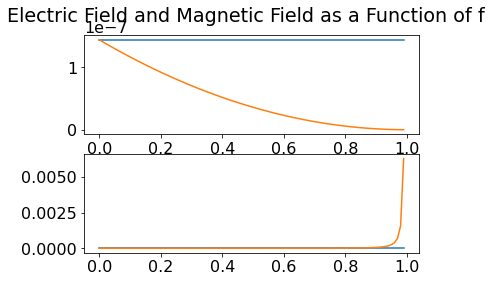

In [127]:
I = 1 
R = 1
r = 0.1
q = constants.e
f = 0

e_list= []
ep_list = []
f_list = []
b_list = []
bp_list = []
r_list = []

while 0 <= f <= 1:
    ep_prime = 1/(((constants.c**2)*(1-f)**2)*constants.mu_0)
    mu_prime = 1/((constants.epsilon_0)*((constants.c)**2)*((1-f)**2)) 
    e_field = q/(4*constants.pi*constants.epsilon_0*r**2)
    ep_field = q/(4*constants.pi*ep_prime*r**2)
    b_field = (constants.mu_0*I)/(2*R)
    bp_field = (mu_prime*I)/(2*R)
    e_list.append(e_field)
    ep_list.append(ep_field)
    b_list.append(b_field)
    bp_list.append(bp_field)
    f_list.append(f)
    f = f + 0.01
    
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Electric Field and Magnetic Field as a Function of f')
ax1.plot(f_list, e_list)
ax1.plot(f_list, ep_list)
ax2.plot(f_list,b_list)
ax2.plot(f_list, bp_list)


#The x-axis is the values of f, and the y-axis is the electric field (V/m) for the top graph and magnetic field (A/m) for the bottom subplot
#For each graph, the blue curve is the normal electric field and magnetic field, the orange curve is he electric field prime and magnetic field prime

Conceptual questions about the conflict between the Galilean velocity transformation and E&M are in the written homework assignment.